# Results

Linear Regression Model

- Coefficient of determination (R^2): 0.83 which means that 83% of ridership in the day can be explained via the features we selected
- Mean squared error (MSE): 0.01

In [ ]:
# IMport libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (15, 7)

# The Dataset

-  US bike-sharing provider BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19

Business Goals
- Required to model the demand for shared bikes with the available independent variables 
- Used by the management to understand how exactly the demands vary with different features

This notebook was made in reference with another found at: https://www.kaggle.com/shrutidandagi/boombikes-ml-linear-regression

In [ ]:
# Load the dataset
# Load in the datasets
df = pd.read_csv('/content/drive/MyDrive/Datasets/Bike Sharing Dataset/day.csv')

In [ ]:
# Check the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [ ]:
# Check for missing values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

From the above, the only datatype that we have to deal with is the 'dteday' datatype. We need to convert this from string to datetime. Since, there are no null values, there is no need to do any cleaning on that end.

In [ ]:
# Check the date formatting of the 'dteday'
df['dteday']

0      01-01-2018
1      02-01-2018
2      03-01-2018
3      04-01-2018
4      05-01-2018
          ...    
725    27-12-2019
726    28-12-2019
727    29-12-2019
728    30-12-2019
729    31-12-2019
Name: dteday, Length: 730, dtype: object

In [ ]:
# Create a date parset and re-read the dataset in with the appropriate date parser
d_parser = lambda x: pd.datetime.strptime(x, '%d-%m-%Y')

df = pd.read_csv('/content/drive/MyDrive/Datasets/Bike Sharing Dataset/day.csv', parse_dates=['dteday'], date_parser=d_parser)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [ ]:
# Check again the  datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [ ]:
# Check the head of the dataset
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,2019-12-27,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,2019-12-28,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,2019-12-29,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,2019-12-30,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


Extras:

According to https://medium.com/analytics-vidhya/bike-sharing-providers-heres-a-guide-to-boost-up-your-business-3372afc9a37e#:~:text=The%20columns%20like%20season%20and,%2C%204%3A%20Heavy%20Rain).

The columns like season and weathersit (meaning weather situation) have values ranging from 1 to 4 which have specific labels associated with them. For season, the labels are (1:spring, 2:summer, 3:fall, 4:winter). For weathersit, the labels are (1: Clear, 2: Misty, 3: Light Rain, 4: Heavy Rain)

## Rename categorical variables for better clarification when exploring

In [ ]:
# Mapping variables season, month, year, holiday and workingday
df['yr'] = df.yr.map({0: '2018', 1: '2019'})
df['season'] = df.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
df['mnth'] = df.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
df['holiday'] = df.holiday.map({0:'No',1:'Yes'})
df['workingday'] = df.workingday.map({0:'No',1:'Yes'})

In [ ]:
# Check the head of the dataset
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,2018,Jan,No,6,No,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,spring,2018,Jan,No,0,No,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,spring,2018,Jan,No,1,Yes,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,spring,2018,Jan,No,2,Yes,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,spring,2018,Jan,No,3,Yes,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Data Vizualization

In [ ]:
# Identify continuous vs discrete features
df.nunique().sort_values()

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
casual        605
windspeed     649
registered    678
atemp         689
cnt           695
instant       730
dteday        730
dtype: int64

In [ ]:
# Look at numeric and categorical values separately 
df_num = df[['temp','atemp','hum','windspeed', 'casual', 'registered', 'cnt']]
df_cat = df[['season','yr','mnth','holiday','weekday','workingday', 'weathersit']]

In [ ]:
# Check above continuous df
df_num

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331,654,985
1,14.902598,17.68695,69.6087,16.652113,131,670,801
2,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...
725,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [ ]:
# Check the categorical df
df_cat

,season,yr,mnth,holiday,weekday,workingday,weathersit
0,spring,2018,Jan,No,6,No,2
1,spring,2018,Jan,No,0,No,2
2,spring,2018,Jan,No,1,Yes,1
3,spring,2018,Jan,No,2,Yes,1
4,spring,2018,Jan,No,3,Yes,1
...,...,...,...,...,...,...,...
725,spring,2019,Dec,No,4,Yes,2
726,spring,2019,Dec,No,5,Yes,2
727,spring,2019,Dec,No,6,No,2
728,spring,2019,Dec,No,0,No,1


## Explore Continuous Features

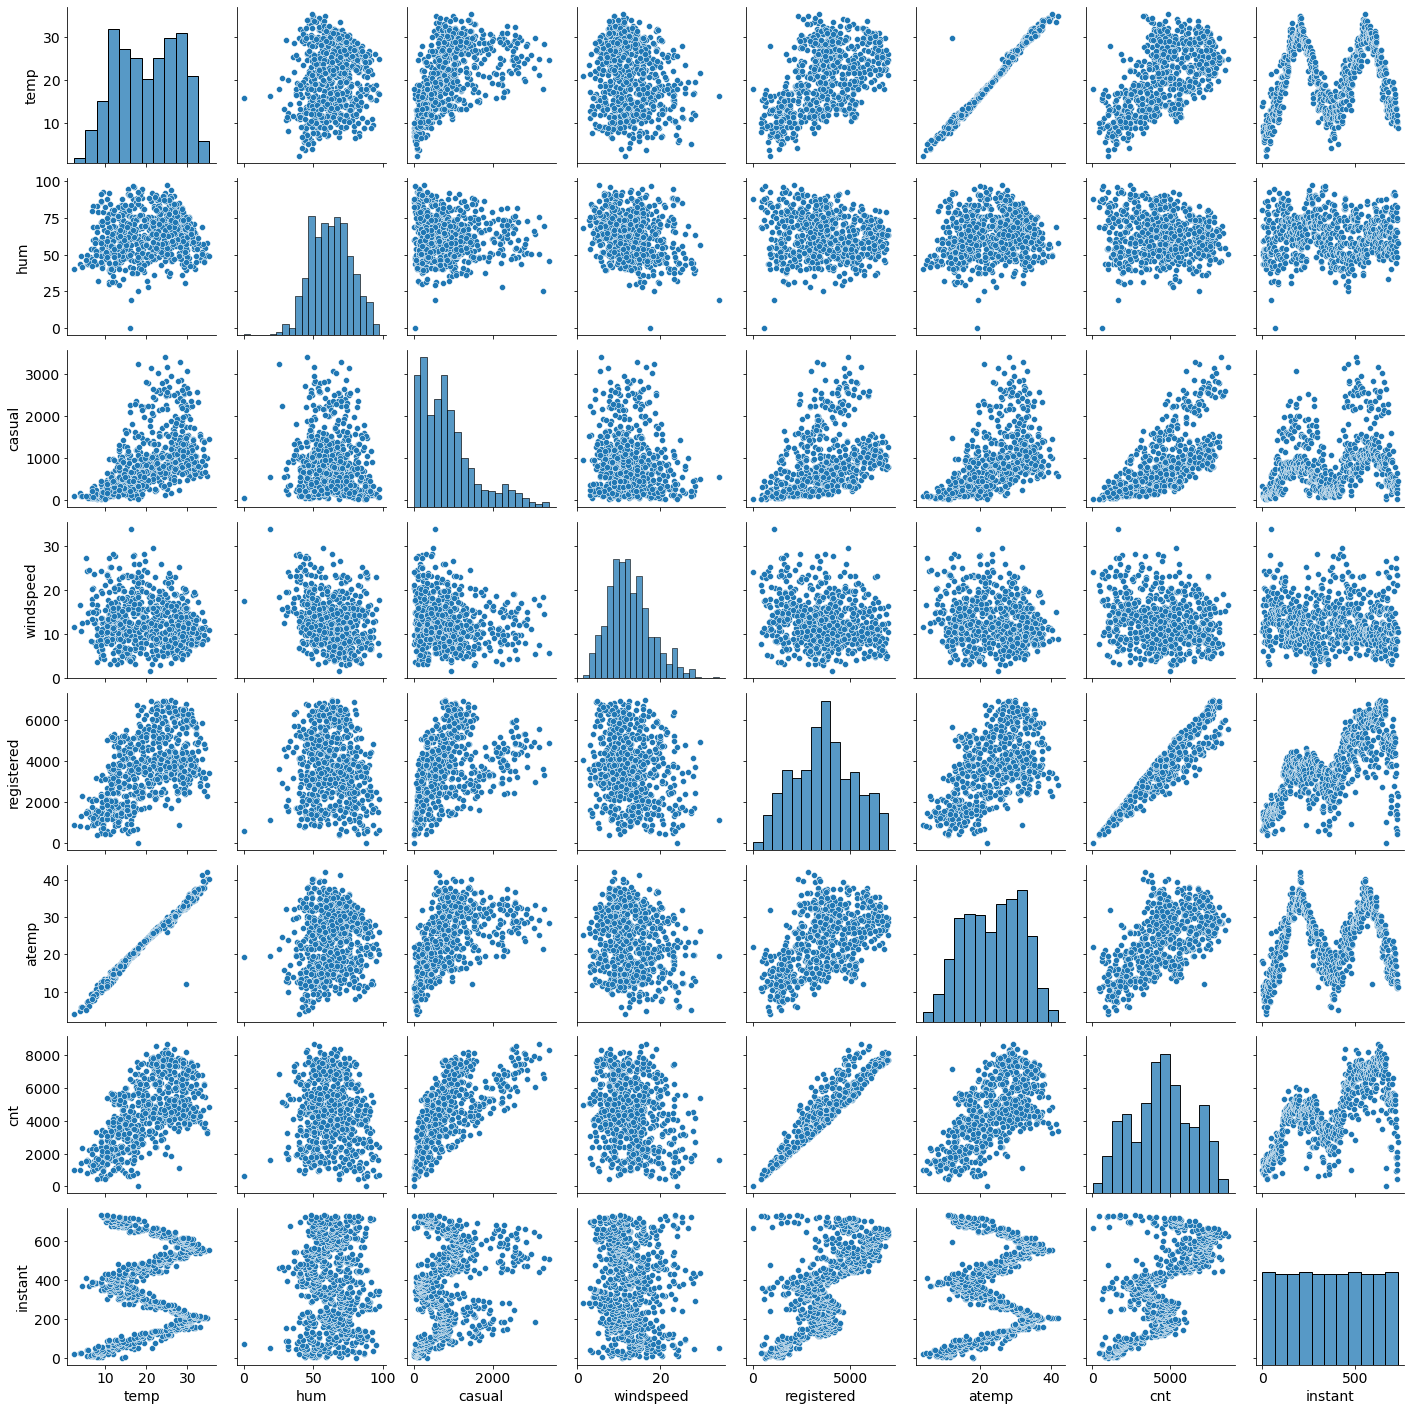

In [ ]:
# Pairplot for numeric variables
sns.pairplot(df, vars=["temp", "hum",'casual','windspeed','registered','atemp','cnt', 'instant'])
plt.show()

- We can see that 'temp' and 'atemp' are positively correlated to 'cnt' i.e. bike rentals are more correlated to the temperature of the day

In [ ]:
# Set to show all columns
pd.set_option('display.max_columns', df.shape[1])

                temp     atemp       hum  windspeed    casual  registered  \
temp        1.000000  0.991696  0.128565  -0.158186  0.542731    0.539436   
atemp       0.991696  1.000000  0.141512  -0.183876  0.543362    0.543678   
hum         0.128565  0.141512  1.000000  -0.248506 -0.075211   -0.089212   
windspeed  -0.158186 -0.183876 -0.248506   1.000000 -0.167995   -0.217914   
casual      0.542731  0.543362 -0.075211  -0.167995  1.000000    0.394137   
registered  0.539436  0.543678 -0.089212  -0.217914  0.394137    1.000000   
cnt         0.627044  0.630685 -0.098543  -0.235132  0.672123    0.945411   

                 cnt  
temp        0.627044  
atemp       0.630685  
hum        -0.098543  
windspeed  -0.235132  
casual      0.672123  
registered  0.945411  
cnt         1.000000  


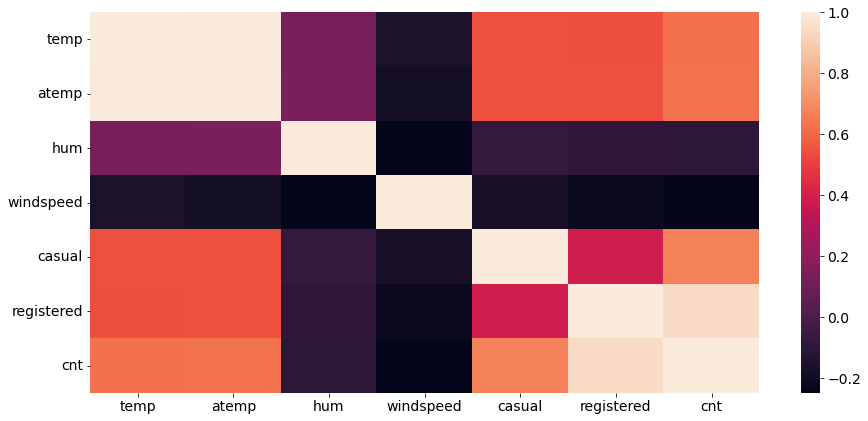

In [ ]:
# Print correlation matrix and heatmap
print(df_num.corr())
sns.heatmap(df_num.corr())

- Confirming our graphs, we see that
  - 'temp' has a +0.627 correlation with 'cnt'
  - 'atemp' has a +0.631 correlation with 'cnt'

## Explore the Categorical Features

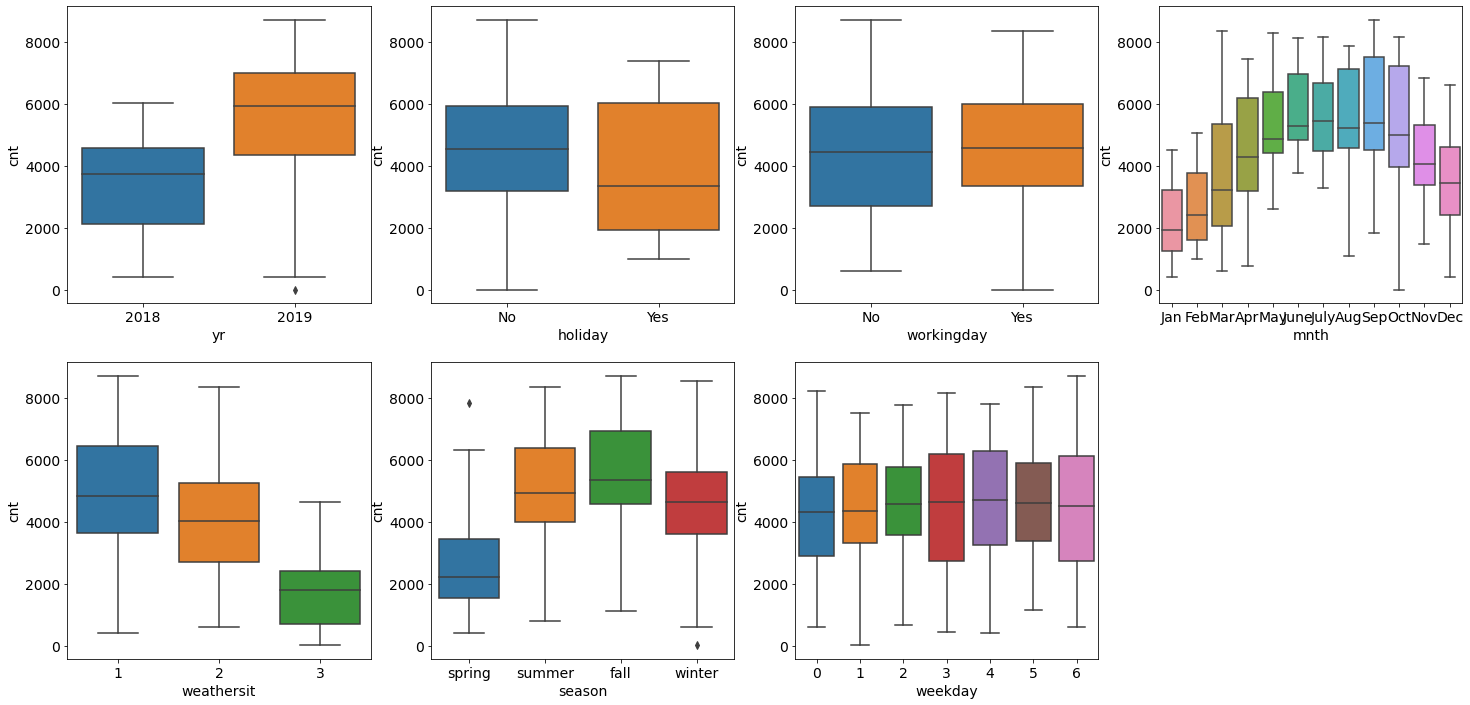

In [ ]:
# Relationship between categorical and continuous variable
plt.figure(figsize=(25, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,4,4)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,4,6)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,4,7)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.show()

- They company grew and managed to get more riders in 2019 as compared to 2018
  - Should be prudent and not expect same ridership when coronavirus pandemic is over
- More riders during holidays but less on non-working days
- Ridership slowly increase throughout the months starting from January and tapers off staring on October
  - Can conjecture that seasons have to play apart on this
- Ridership is highest in the '1' category of weather situation and lowest in the '3' category
  - Explore if the weather situation correlates to the seasons
- Ridership is highest during fall and summer but lower in winter and spring

# Questions to ask

## What is the ridership looks like over the years?

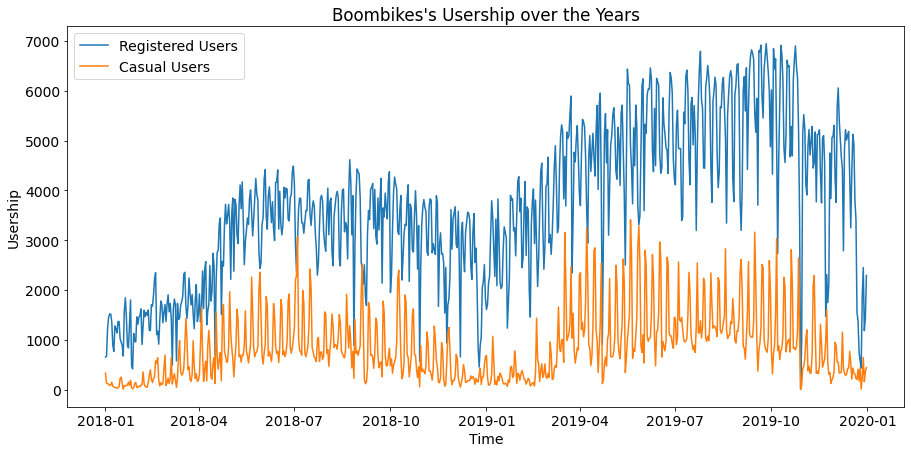

In [ ]:
# Plot registered users  agaisnt time
plt.plot(df['dteday'], df['registered'], label='Registered Users')
## Plot casual users  agaisnt time
plt.plot(df['dteday'], df['casual'], label='Casual Users')

# Set x-label
plt.xlabel('Time')
# Set y-label
plt.ylabel('Ridership')
# Set title
plt.title('Boombikes\'s Usership over the Years')

# Set legend
plt.legend()


plt.show()

In [ ]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


From the above, we can see that the 
- Trend is that the ridership increases at the beginning of the year and tapers off near the end of the year around October. 
- This is clearly seen trends in both years and we could conjecture that riding bikes during the winter months is impractical compared to the Spring and Summer months.
- The peak ridership is at 8714 users. 
- Not on the same day, registered users peaked at 6946 users 
- while casual users peaked at 3410 users.
- Casual users did not see as much growth as registered user

## What is the ridership like by seasons?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


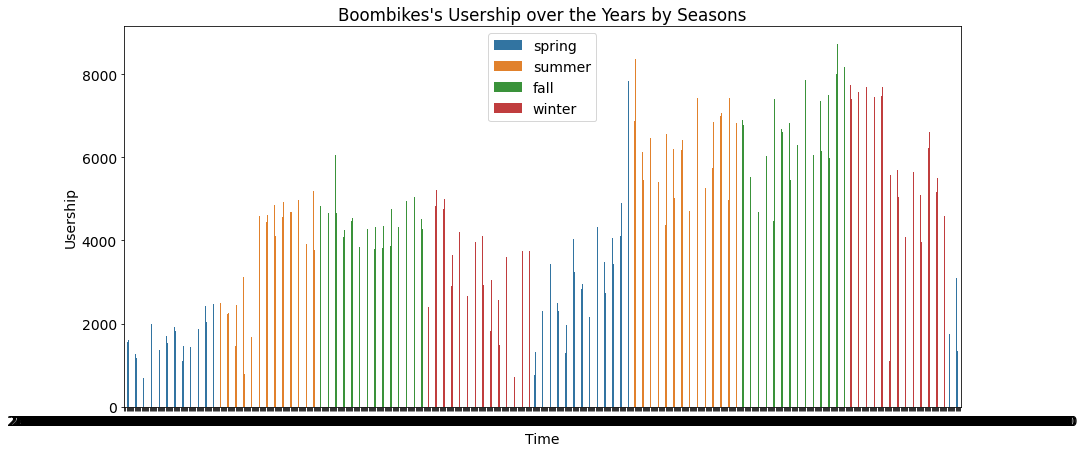

In [ ]:
# Plot time against count colored by seasons
sns.barplot(df['dteday'], df['cnt'], hue = df['season'])

# Set x-label
plt.xlabel('Time')
# Set y-label
plt.ylabel('Ridership')
# Set title
plt.title('Boombikes\'s Usership over the Years by Seasons')

# Set legend
plt.legend()

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


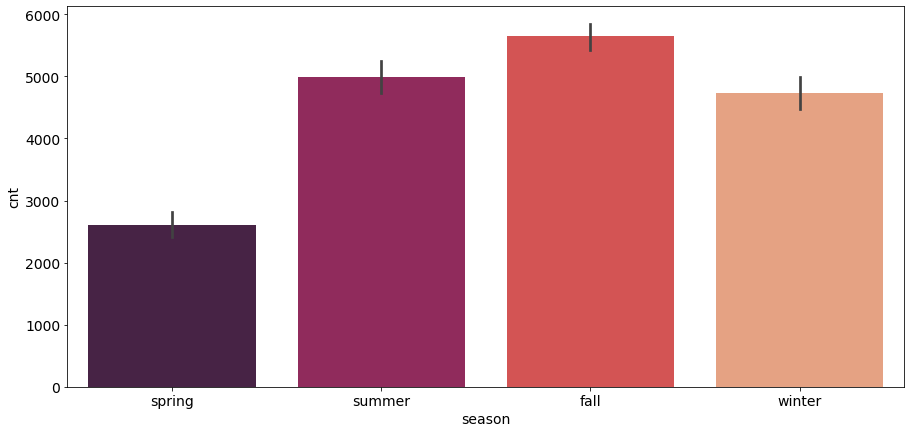

In [ ]:
# Barplot to see relation between season and count of bike rentals
sns.barplot('season','cnt',data=df, palette="rocket",)
plt.show()

We can see:
- Increase in Spring months and Summer months
- Decreases in Winter and Spring months which support our previous hypothesis
- Highest in Fall and Summer month

## What is the ridership like during holidays?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


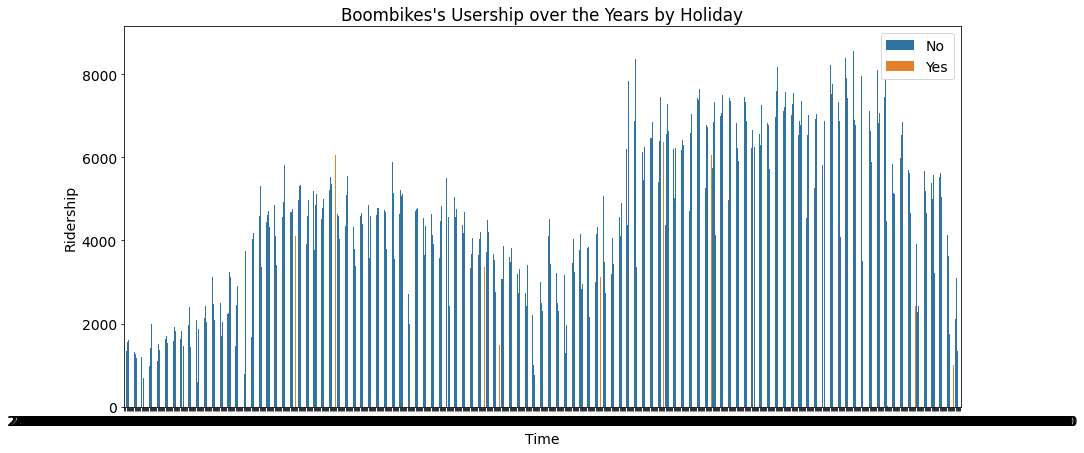

In [ ]:
# Plot time against count colored by holiday 
sns.barplot(df['dteday'], df['cnt'], hue = df['holiday'])

# Set x-label
plt.xlabel('Time')
# Set y-label
plt.ylabel('Ridership')
# Set title
plt.title('Boombikes\'s Usership over the Years by Holiday')

# Set legend
plt.legend()

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


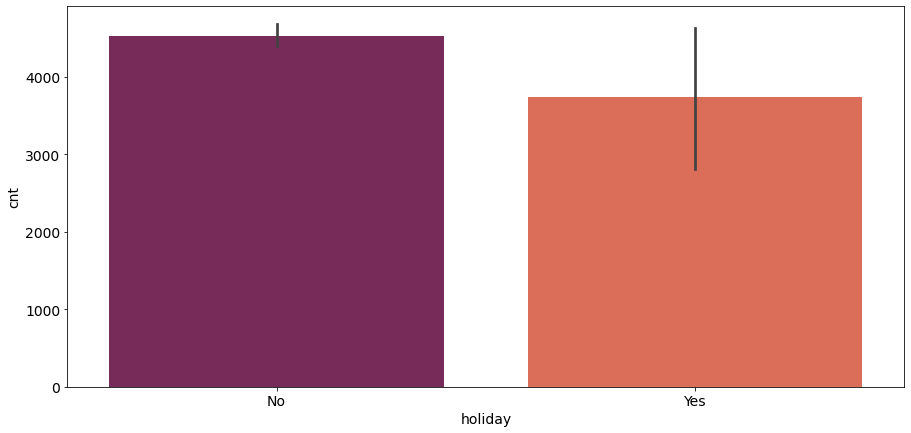

In [ ]:
# Barplot to see relation between holiday and count of bike rentals
sns.barplot('holiday','cnt',data=df, palette="rocket",)
plt.show()

We can see:
- Ridership is lower during holidays


# Preparing for Machine Learning

Since we see that the target variable  is a continuous value, this will be a regression problem.

In [ ]:
# Reload date parset and re-read the dataset in with the appropriate date parser
d_parser = lambda x: pd.datetime.strptime(x, '%d-%m-%Y')

df = pd.read_csv('/content/drive/MyDrive/Datasets/Bike Sharing Dataset/day.csv', parse_dates=['dteday'], date_parser=d_parser)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [ ]:
# Mapping variables season, month, year, holiday and workingday
df['season'] = df.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
df['mnth'] = df.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [ ]:
# Drop unnecessary columns
df = df.drop(['instant','dteday','casual', 'registered','atemp'], axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,6,0,2,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,0,0,2,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,1,1,1,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,2,1,1,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,3,1,1,9.305237,43.6957,12.522300,1600


## One-hot encode variables

In [ ]:
# Get the dummy variables for month, season, weathersit, weekday and Let's drop the first column from  using 'drop_first = True'pd.get_dummies(bike.season,drop_first=True)
months = pd.get_dummies(df.mnth, drop_first=True)
weekdays = pd.get_dummies(df.weekday, drop_first=True)
weathersit = pd.get_dummies(df.weathersit, drop_first=True)
seasons = pd.get_dummies(df.season, drop_first=True)

# Drop un-encoded features
df.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

# Add the results to the original bike dataframe
df = pd.concat([months,weekdays,weathersit,seasons, df], axis=1)

df.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,...,winter,yr,holiday,workingday,temp,hum,windspeed,cnt
0,0,0,0,1,0,0,0,0,...,0,0,0,0,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,...,0,0,0,0,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,...,0,0,0,1,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,...,0,0,0,1,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,...,0,0,0,1,9.305237,43.6957,12.522300,1600


## Check correlations

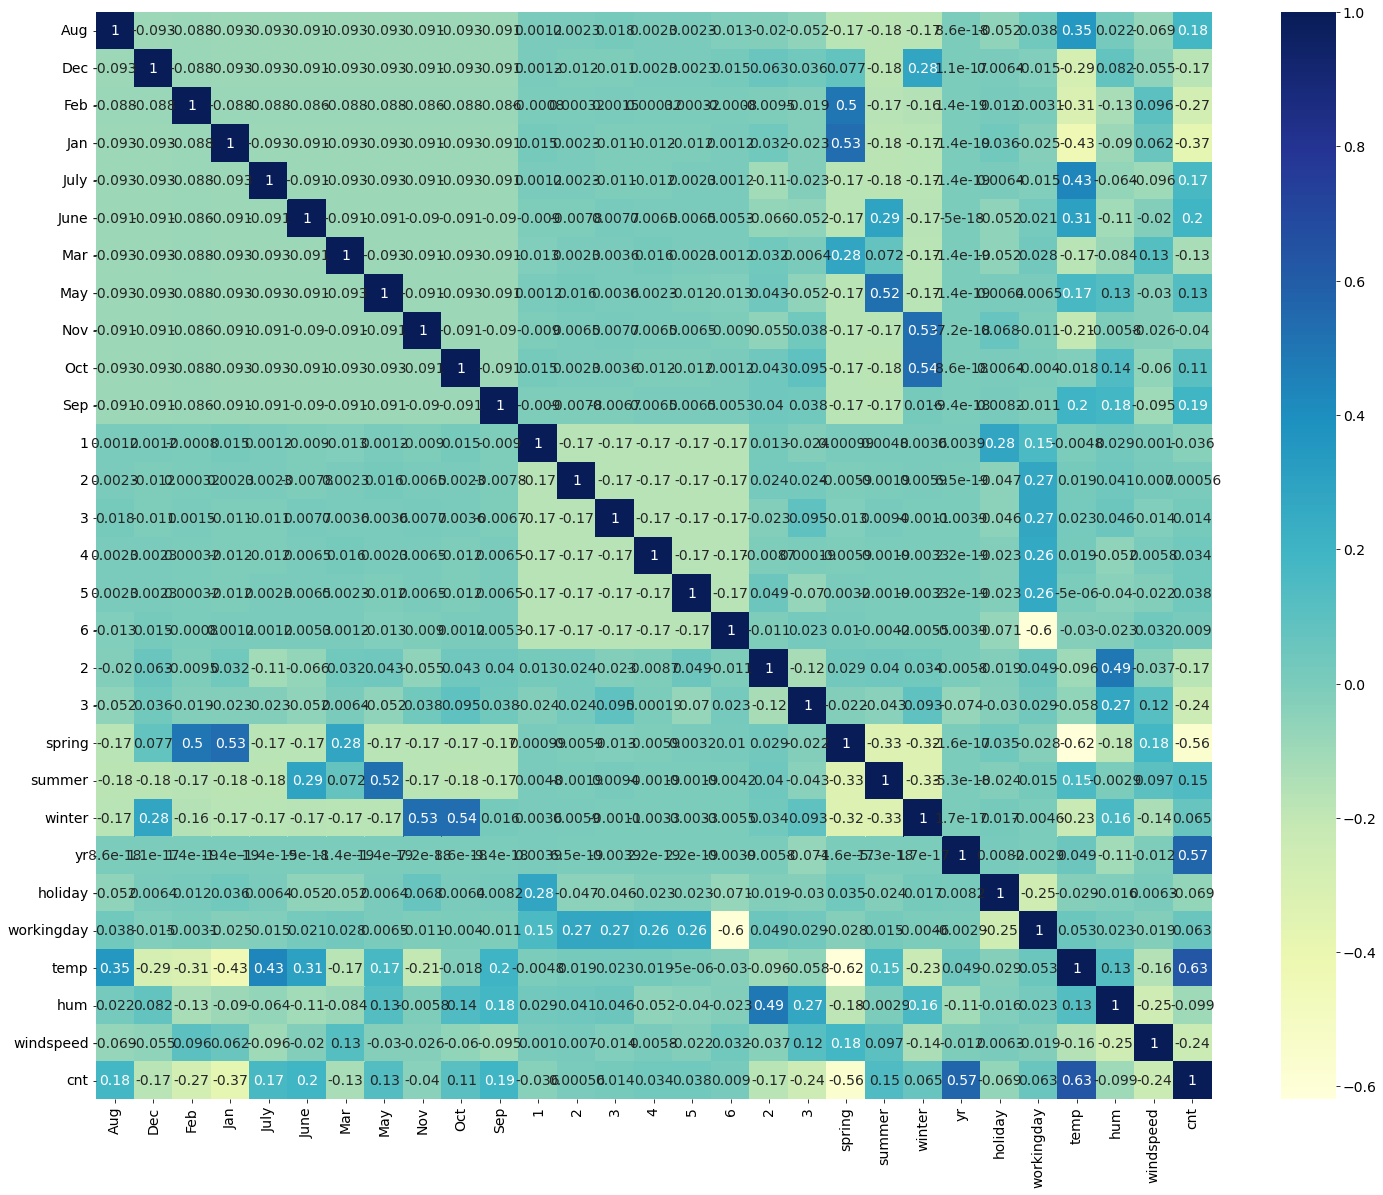

In [ ]:
# Now lets check the correlation between features again
# Heatmap to see correlation between features
plt.figure(figsize=(25, 20))
sns.heatmap(df.corr(), cmap='YlGnBu', annot = True)
plt.show()

## Scaling the Dataset

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Instantiate a MinMaxScaler object
scaler = MinMaxScaler()

# Create a list of continuous features
con_feat = ['temp','hum','windspeed','cnt']

# Fit on dataset
df[con_feat] = scaler.fit_transform(df[con_feat])
df.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,...,winter,yr,holiday,workingday,temp,hum,windspeed,cnt
0,0,0,0,1,0,0,0,0,...,0,0,0,0,0.355170,0.828620,0.284606,0.110792
1,0,0,0,1,0,0,0,0,...,0,0,0,0,0.379232,0.715771,0.466215,0.089623
2,0,0,0,1,0,0,0,0,...,0,0,0,1,0.171000,0.449638,0.465740,0.152669
3,0,0,0,1,0,0,0,0,...,0,0,0,1,0.175530,0.607131,0.284297,0.177174
4,0,0,0,1,0,0,0,0,...,0,0,0,1,0.209120,0.449313,0.339143,0.181546


Now all the numeric features are mapped between 0 and 1

## Split train/test

In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 100)

In [ ]:
y_train = df_train.pop('cnt')
X_train = df_train

y_test = df_test.pop('cnt')
X_test = df_test

# Building a Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a linear regression object()
lm = LinearRegression()

In [ ]:
# Train the model using the training sets
lm.fit(X_train, y_train) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


LinearRegression()

In [ ]:
# Make the predictions
y_pred = lm.predict(X_test) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
# Print model performance
print('Coefficients:', lm.coef_)
print('Intercept:', lm.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_pred))

Coefficients: [ 2.03762587e-02 -6.00243957e-02 -5.05802215e-02 -8.46540922e-02
 -3.53098746e-02  1.51245406e-03 -2.79428112e-02  1.96526628e-02
 -4.96967903e-02  2.85779960e-03  8.44914092e-02  4.12304896e+12
  4.12304896e+12  4.12304896e+12  4.12304896e+12  4.12304896e+12
  6.43204280e-02 -6.20875162e-02 -2.55235532e-01 -3.07739662e-02
  4.79736696e-02  1.12319285e-01  2.32429660e-01 -4.12304896e+12
 -4.12304896e+12  4.31665230e-01 -1.43008784e-01 -1.91986164e-01]
Intercept: 0.29209294125673557
Mean squared error (MSE): 0.01
Coefficient of determination (R^2): 0.83


# Conclusions

## From Exploratory Analysis


1. There is growth in ridership from 2018 to 2019
2. The main contributor to the number of riders a day is 'temp' and 'atemp'
3. There is positive correlations for Summer and Fall month and so are their corresponding months

## From Linear Regression

1. Coefficient of determination (R^2): 0.83 which means that 83% of ridership in the day can be explained via the features we selected
2. Mean squared error (MSE): 0.01